<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVPPuc_Sprint2/blob/MVP_PUC_ThiagoPedrazi/MVP_Sprint2B_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sprint 2B

https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr

In [1]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avisos
import warnings
warnings.filterwarnings('ignore')

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')

# Libs
import re # REGEX
import nltk # NLP

In [2]:
# Projeto B - Deep learning

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVPPuc_Sprint2/MVP_PUC_ThiagoPedrazi/Tweets_Mg.csv"

# Lê o arquivo
Base_Dados = pd.read_csv(url, delimiter=',')

# Dimensão
Base_Dados.shape

(8199, 26)

In [3]:
# Veriicar
Base_Dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Modelagem & EDA (Exploração)**

## **Campos Nulos**

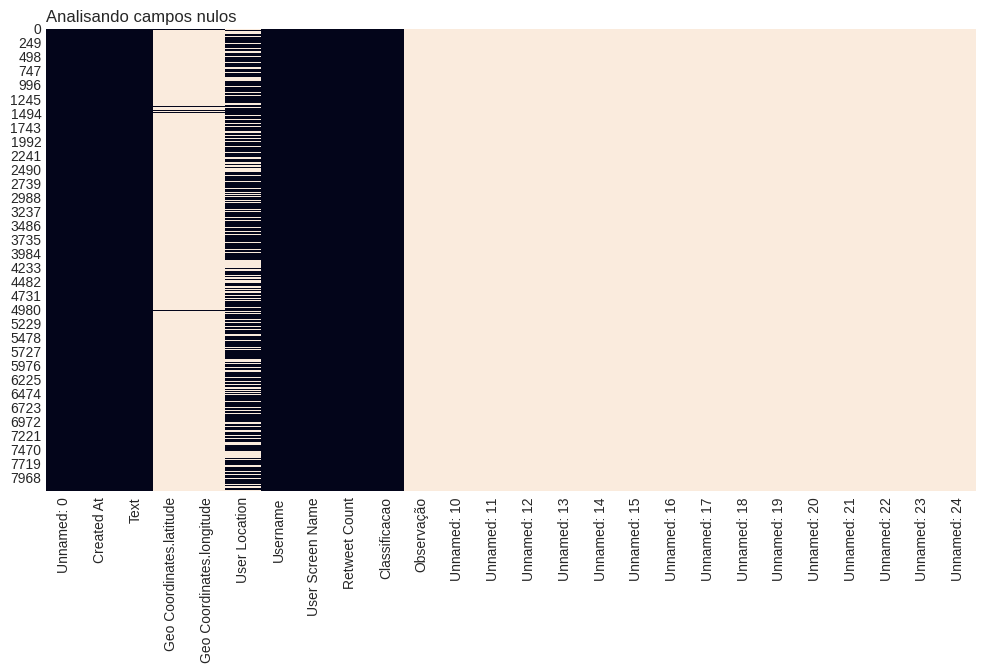

In [4]:
# campos nulos
Nulos = Base_Dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( Nulos, cbar=False );

In [5]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [6]:
# Remover as colunas
Colunas_Extrair = Base_Dados.columns[10:]
Base_Dados.drop( columns=Colunas_Extrair, inplace=True )

In [7]:
# Dimensão
Base_Dados.shape

(8199, 10)

In [8]:
# Unicos
Base_Dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [9]:
# Retirar
Base_Dados.drop( columns='Unnamed: 0', inplace=True )

# Dimensão
Base_Dados.shape

(8199, 9)

In [10]:
# Verificando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [11]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [12]:
# Função
from dateutil.parser import parse

Experimento_Data = Base_Dados['Created At'][0]

print( f'Antes: {Experimento_Data}' )
print( f'Depois: { parse( Experimento_Data ).date() }' )

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [13]:
# Função para extrair

def Ajustar_Data( Data ):
  '''
    Função para converter Data
  '''
  # Atribuir
  Texto_Data = Data
  # Transform
  Transformacao = parse( Texto_Data )
  # Extracação
  Data_Formatada = Transformacao.date()
  return Data_Formatada

# Atribuindo função
Base_Dados['Data_Formatada'] = Base_Dados['Created At'].apply( Ajustar_Data )

# Filtro
Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [14]:
# Exemplo de outra forma
Base_Dados['Created At'].apply( lambda Texto : parse(Texto).date() )

0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object

In [15]:
# Gerando Meses,Ano,Dias

# transforma data
Base_Dados['Data_Formatada'] = pd.to_datetime( Base_Dados['Data_Formatada'] )

# Extraindo
Base_Dados['Ano'] = Base_Dados['Data_Formatada'].dt.year
Base_Dados['Mes'] = Base_Dados['Data_Formatada'].dt.month
Base_Dados['Dia'] = Base_Dados['Data_Formatada'].dt.day

Base_Dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [16]:
# Analisando
Base_Dados.groupby( by=['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando Geo-Localização**

In [17]:
Base_Dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [18]:
# Filtrando os nulos
Analise_Geo = Base_Dados.loc[
    ( Base_Dados['Geo Coordinates.latitude'].notnull() ) &
    ( Base_Dados['Geo Coordinates.longitude'].notnull() )
]

# Shape
Analise_Geo.shape

(104, 13)

In [19]:
# Verificar
Analise_Geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [20]:
# Agrupar as Geo
Analise_Localizacao = Analise_Geo.groupby( by=['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[['Username']].reset_index()

# Renomeando colunas
Analise_Localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando
Analise_Localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [21]:
# Plot dos dados
px.density_mapbox(
    # Dados
    Analise_Localizacao,
    # LAtitude
    lat='Lat',
    # Longitude
    lon='Lon',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

In [22]:
# Verificando
Base_Dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [23]:
# Instalando o GEO PY
!pip install geopy

In [24]:
# Função
from geopy.geocoders import Nominatim

# Instanciando a função
Instanciando_Funcao = Nominatim( user_agent='GetLoc' )

In [25]:
print(f'Local: { Instanciando_Funcao.geocode("Brasil").address } ')
print(f'Latitude: { Instanciando_Funcao.geocode("Brasil").latitude }')
print(f'Longitude: { Instanciando_Funcao.geocode("Brasil").longitude }')

Local: Brasil 
Latitude: -10.3333333
Longitude: -53.2


In [26]:
# Analise de representatividade
Analise_Local = Base_Dados['User Location'].value_counts( normalize=True ).cumsum().reset_index()

# Filtrando apenas até 50%
Analise_Local = Analise_Local.loc[ Analise_Local['User Location'] < 0.5 ]

# Renomear colunas
Analise_Local.columns = ['Local', '%']

# Verificando
Analise_Local.head()

,Local,%
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [27]:
# Dimensão
Analise_Local.shape

(39, 2)

In [28]:
# Calcular quantidade
Quantidade = Base_Dados['User Location'].value_counts().reset_index()

Quantidade.columns = ['Local', 'Quantidade']

Quantidade.head()

,Local,Quantidade
0,Brasil,591
1,Minas Gerais,354
2,Belo Horizonte - Minas Gerais,234
3,"Belo Horizonte, Brasil",227
4,Belo Horizonte,131


In [29]:
# Cruzar
Tab_Localizacao = pd.merge( Analise_Local, Quantidade, on=['Local'], how='inner' )

# VErificar
Tab_Localizacao.head()

,Local,%,Quantidade
0,Brasil,0.107670,591
1,Minas Gerais,0.172163,354
2,Belo Horizonte - Minas Gerais,0.214793,234
3,"Belo Horizonte, Brasil",0.256149,227
4,Belo Horizonte,0.280015,131


In [30]:
# Valore unicos
Tab_Localizacao['Local'].unique()

array(['Brasil', 'Minas Gerais', 'Belo Horizonte - Minas Gerais',
       'Belo Horizonte, Brasil', 'Belo Horizonte', 'Brazil',
       'São Paulo, Brasil', 'Rio de Janeiro, Brasil',
       'Belo Horizonte MG Brasil', 'São Paulo', 'Minas Gerais, Brasil',
       'Guarulhos - SP', 'Rio de Janeiro', 'São Joquim de Bicas',
       'Brasília, Brasil', 'Brasil Natal/RN', '-16.683649,-49.268102',
       'Babilonia', 'Rio de Janeiro, Brazil',
       'Fortaleza - Ceará - Brazil', 'WorldWide', 'Manaus-Amazonas',
       'BRASIL', 'Belo Horizonte, Minas Gerais', 'Rio de Janeiro, RJ',
       'Belo Horizonte - MG', 'Ouro Preto - MG Brasil',
       'Governador Valadares', 'Belo Horizonte/MG', 'Hollywood, CA',
       'Minas Gerais - Brasil', 'Sorocaba, Brasil',
       'Governador Valadares, Brasil', 'No coração das Minas Gerais ',
       'brasil', 'Vitória - ES, Brasil', 'Pará de Minas / MG',
       'República de Curitiba', 'Belo Horizonte, MG'], dtype=object)

In [31]:
# Incluindo a Geo Localização com GEOPY

Tab_Localizacao['Latitude'] = None
Tab_Localizacao['Longitude'] = None

# Loop
for Loop in range( 0, len(Tab_Localizacao['Local']) ):

  try:
    Local = Instanciando_Funcao.geocode( Tab_Localizacao['Local'][Loop]  )

  except:
    pass

  if Local!= None:
    Tab_Localizacao['Latitude'][Loop] = Local.latitude
    Tab_Localizacao['Longitude'][Loop] = Local.longitude


  #print( Loop )

In [32]:
Tab_Localizacao.head()

,Local,%,Quantidade,Latitude,Longitude
0,Brasil,0.107670,591,-10.333333,-53.2
1,Minas Gerais,0.172163,354,-18.526484,-44.158865
2,Belo Horizonte - Minas Gerais,0.214793,234,-19.922732,-43.945095
3,"Belo Horizonte, Brasil",0.256149,227,-19.922732,-43.945095
4,Belo Horizonte,0.280015,131,-19.922732,-43.945095


In [33]:
3 # Plot dos dados
px.density_mapbox(
    # Dados
    Tab_Localizacao,
    # LAtitude
    lat='Latitude',
    # Longitude
    lon='Longitude',
    # Quantidade
    z='Quantidade',
    # Estilo do mapa
    mapbox_style='stamen-terrain',
    # Centralização
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom do mapa
    zoom=3,
    # Ciruclo
    radius=30
)

## **Analise outras variáveis**

In [34]:
# Usuarios
Base_Dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Daniel Araujo #beta     124
Hugo TIMBETA            100
Camila Maciel Serrão     91
Raynniere Makepeace      77
                       ... 
Russo Guedes              1
LUCIANO-LUMOTOKA          1
Hilton Vilar              1
tina thom                 1
Pornografia Destrói       1
Name: Username, Length: 3907, dtype: int64

In [35]:
# Usuarios
Base_Dados['User Screen Name'].value_counts()

pmmg190            297
danaraujjobeta     124
Hugotim1           100
CamilaMacielSer     91
itsRaynniere        77
                  ... 
gcvascon             1
ClaudioHirakawa      1
SeleneSCW            1
MarcusMartinho       1
porndestroi          1
Name: User Screen Name, Length: 3966, dtype: int64

In [36]:
# Retutiters
Base_Dados['Retweet Count'].value_counts( normalize=True ).head()

0      0.549091
1      0.072692
2      0.037444
444    0.036590
3      0.021100
Name: Retweet Count, dtype: float64

## **Analise da Classificação**

In [37]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

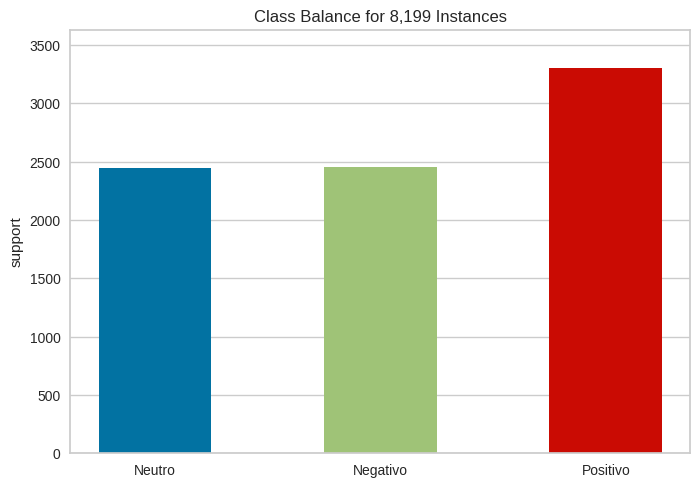

In [38]:
#!pip install Yellowbrick

# Yellowbrick
# Balanço
from yellowbrick import ClassBalance

# Instanciar
Grafico_Balanco = ClassBalance( labels=['Neutro', 'Negativo', 'Positivo'] )
Grafico_Balanco.fit( Base_Dados['Classificacao'] )
Grafico_Balanco.show();

In [39]:
# Plot - Avaliar
Anl_Valores = Base_Dados['Classificacao'].value_counts()

# Plotly
Grafico_Balanco_02 = go.Figure(
    go.Funnelarea(
        text=Anl_Valores.index,
        values=Anl_Valores.values,
        title={'text':'Distribuição dos Sentimentos', 'position':'top center'}
    )
)

Grafico_Balanco_02.show()

### **Quantidade de Palavras**

In [40]:
# Quantidade de palavras
Exemplo = 'Hoje está chovendo!'
Exemplo.split()
len( Exemplo.split() )

3

In [41]:
# função para calcular o tamanho
def Quantidade_Palavras( Texto ):
  Quebrar = Texto.split()
  Quantidade = len( Quebrar )
  return Quantidade
Base_Dados['Quantidade_Palavras'] = Base_Dados['Text'].apply( Quantidade_Palavras )

# Veriricando
Base_Dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia,Quantidade_Palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9,20


In [42]:
# Analise
Base_Dados['Quantidade_Palavras'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Quantidade_Palavras, dtype: float64

In [43]:
# Plot
px.box( Base_Dados, x='Classificacao', y='Quantidade_Palavras', color='Classificacao', title='Quantidade Palavras por Sentimento')

### **Nuvem de Palavras**

In [44]:
#!pip install wordcloud

# Função para nuvem de cloud
from wordcloud import WordCloud

In [45]:
# Criando uma wordcoud
# 1º Concatenar o texto em um unica string

# Variavel
Concatenar = ''

# loop no texto
for Loop in Base_Dados['Text']:

  # Loop para concatenar
  for Palavra in Loop.split():
    # Jutandao as palavras
    Concatenar = Concatenar + ' ' + Palavra

print(f'Quantidade de Palavras agrupadas { len(Concatenar) }')

Quantidade de Palavras agrupadas 961415


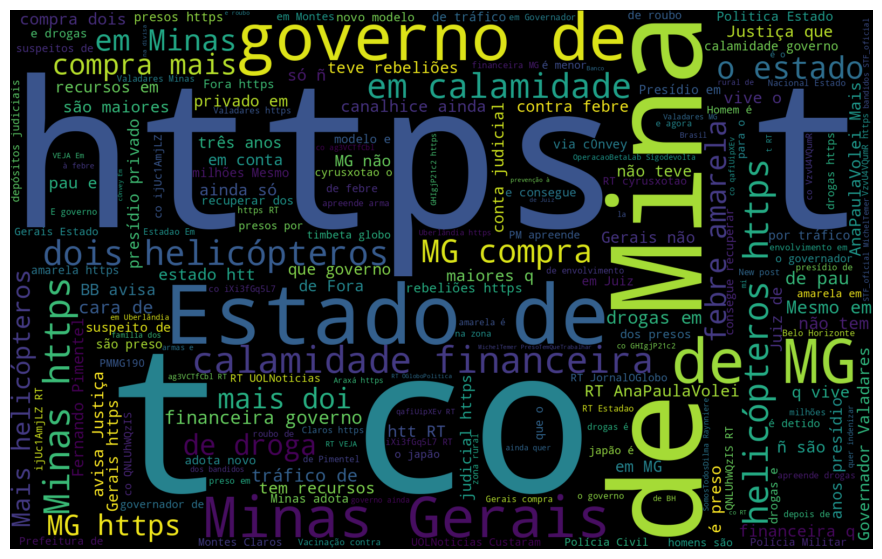

In [46]:
# Plot
# 2º Etapa

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000 ).generate( Concatenar )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 7) )
# Plot
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids
Eixo.set_axis_off()

In [47]:
Base_Dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [48]:
# Ajuste dos textos

Palavras_Positivas = ''
Palavras_Negativas = ''
Palavras_Neutras = ''

# Loop
for Sentimento in Base_Dados['Classificacao'].unique():

  # Analise Positivo
  if Sentimento =='Positivo':
    Filtro = Base_Dados.loc[ Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Positivas = Palavras_Positivas + ' ' + Quebra


  # Analise Negativo
  elif Sentimento =='Negativo':
    Filtro = Base_Dados.loc[ Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Negativas = Palavras_Negativas + ' ' + Quebra

  # Analise Neutro
  else:
    Filtro = Base_Dados.loc[ Base_Dados['Classificacao'] == Sentimento ]

    # Loop para concatenar
    for Palavra in Filtro['Text']:
      for Quebra in Palavra.split():
        Palavras_Neutras = Palavras_Neutras + ' ' + Quebra


print(
    'Quantidade de Palavras: \n',
    f'Positivo: { len(Palavras_Positivas) }',
    f'Negativas: { len(Palavras_Negativas) }',
    f'Neutro: { len(Palavras_Neutras) }',
)

Quantidade de Palavras: 
 Positivo: 374456 Negativas: 307576 Neutro: 279383


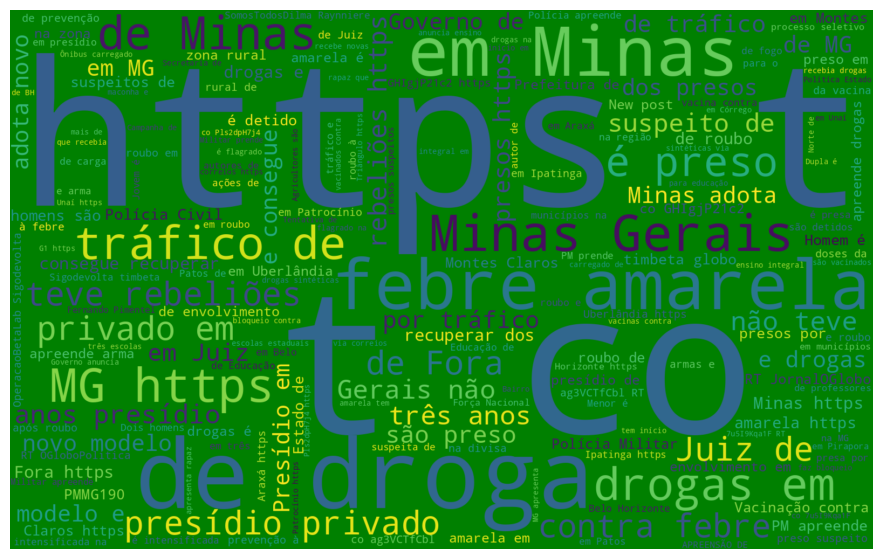

In [49]:
# Analise sentimento - wordcloud Positivas

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='green' ).generate( Palavras_Positivas )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 7) )
# Plot
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids
Eixo.set_axis_off()

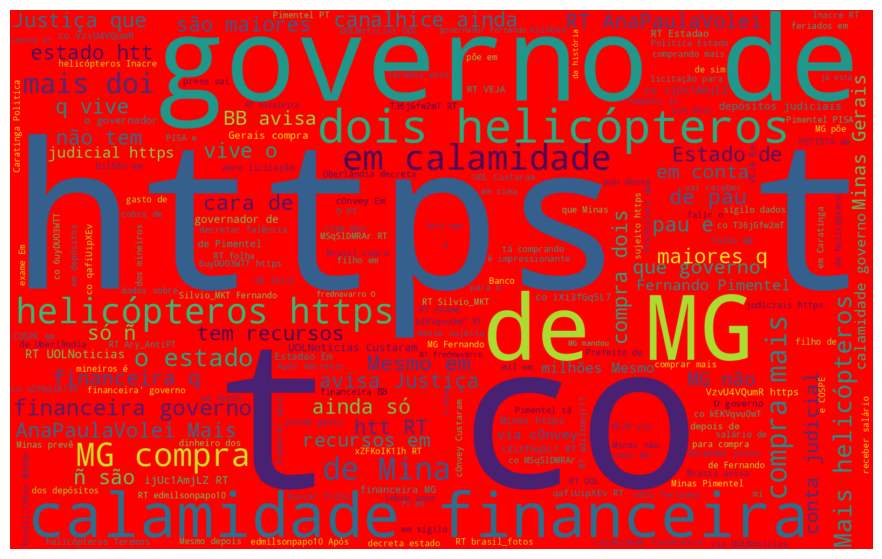

In [50]:
# Analise sentimento - wordcloud Negativas

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='red' ).generate( Palavras_Negativas )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 7) )
# Plot
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids
Eixo.set_axis_off()

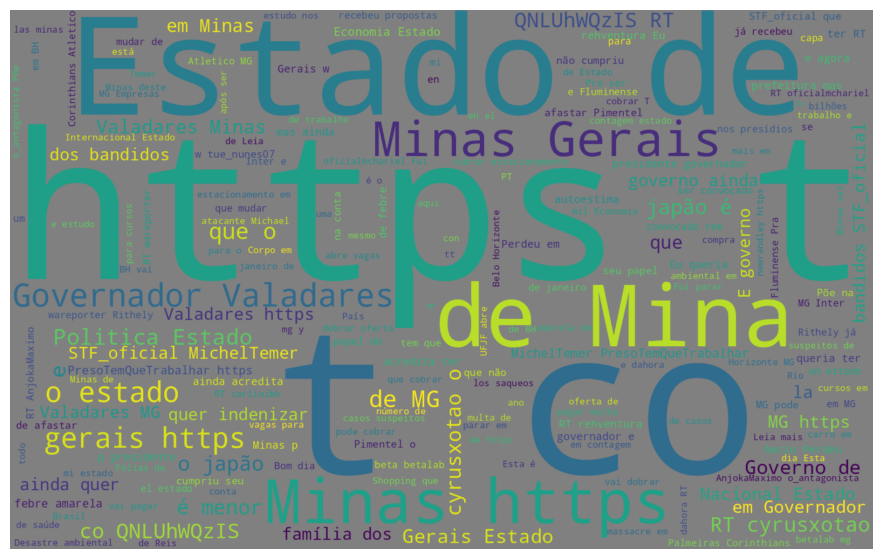

In [51]:
# Analise sentimento - wordcloud Neutras

# Instanciando a Nuvem de Palavras
Nuvem_Palavras = WordCloud( width=1600, height=1000, background_color='gray' ).generate( Palavras_Neutras )

# Tamanho
Figura, Eixo = plt.subplots( figsize=(15, 7) )
# Plot
Eixo.imshow( Nuvem_Palavras, interpolation='bilinear' )
# Desativa os grids
Eixo.set_axis_off()

### **Rank das palavras mais usadas**

In [52]:
# Funcão
from collections import Counter

In [53]:
# Quebrar as frases
Quebra_Frases = Base_Dados['Text'].apply( lambda Texto : str(Texto).split() )

# Rank das Palavras
Dados_Rank = Counter( [ item for sublist in Quebra_Frases for item in sublist ] )

# Tabela
Tab_Quantidade = pd.DataFrame( Dados_Rank.most_common(20) )

# Ajustar as colunas
Tab_Quantidade.columns = ['Palavra', 'Qtd']

# Verificar
Tab_Quantidade

,Palavra,Qtd
0,de,8352
1,em,4003
2,RT,3080
3,Minas,2626
4,e,2079
5,-,1937
6,MG,1849
7,a,1707
8,o,1419
9,do,1415


In [54]:
# Plot das Quantidades
Figura = px.bar(
    Tab_Quantidade,
    x='Qtd',
    y='Palavra',
    color='Palavra',
    orientation='h',
    width=700,
    height=700
)

Figura.show()

# **Mineração de Texto**

## **Remoção duplicados**

In [55]:
# Copia
Copia_Base = Base_Dados.copy()

# Antes
print( Base_Dados.shape )

# Duplicados
Base_Dados.drop_duplicates( ['Text'], inplace=True )

# Depois
print( Base_Dados.shape )

(8199, 14)
(5765, 14)


## **Stops Words**

In [56]:
# Download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
# VErificar
nltk.corpus.stopwords.words('portuguese')[0:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [58]:
# Tamanho
len( nltk.corpus.stopwords.words('portuguese') )

207

In [59]:
# Exemplo
Frase = 'Aqueles rapazes estão felizes'

# Pool de Palavras das StopsWords
Pool_Palavras = nltk.corpus.stopwords.words('portuguese')

# Qubra
Quebra = Frase.split()

# Loop
for Loop in Quebra:

  Palavra = Loop.lower()

  if Palavra not in Pool_Palavras:
    print( Palavra )

rapazes
felizes


In [60]:
# Adicionar palavras
print( type( Pool_Palavras) )

<class 'list'>


In [102]:
Pool_Palavras.append('Odemir')

## **Radical (stemming)**

In [103]:
# Download
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [104]:
# Função Radical
Radical = nltk.stem.RSLPStemmer()

# lista Palavras
Palavras = ['Gostei', 'Gostam', 'Gostarão', 'Gostamos', 'Gostaram']

for Loop in Palavras:

  print( Loop, ' - ', Radical.stem( Loop ) )

Gostei  -  gost
Gostam  -  gost
Gostarão  -  gost
Gostamos  -  gost
Gostaram  -  gost


## **REGEX**

In [105]:
# Frase
Frase_Exemplo = 'Acessei o site do google https:\\www.google.com.br e achei simples!'

In [106]:
# Localizar na frase
re.findall( 'www.', Frase_Exemplo )

['www.']

In [107]:
# Localizar letras
re.findall('[a-d]', Frase_Exemplo )

['c', 'd', 'c', 'b', 'a', 'c']

In [108]:
# Localizar sequencia
re.findall('goo...', Frase_Exemplo ), re.findall('..te', Frase_Exemplo ), re.findall('.it.', Frase_Exemplo ), re.findall('.Zz.', Frase_Exemplo )

(['google', 'google'], ['site'], ['site'], [])

In [109]:
# Substituir valores/textos
print( Frase_Exemplo )
re.sub( 'site', '__SITE___;D ', Frase_Exemplo )

Acessei o site do google https:\www.google.com.br e achei simples!


'Acessei o __SITE___;D  do google https:\\www.google.com.br e achei simples!'

## **Frequências de Palavras**

In [110]:
# Exemplo
Frase = 'Hoje o dia está bonito, incusive hoje estou estudando ciência de dados.'

In [111]:
# Aplicação com o NLTK
Fequencia = nltk.FreqDist( Frase.split() )

# Visualizo
Fequencia.most_common( 13 )

[('Hoje', 1),
 ('o', 1),
 ('dia', 1),
 ('está', 1),
 ('bonito,', 1),
 ('incusive', 1),
 ('hoje', 1),
 ('estou', 1),
 ('estudando', 1),
 ('ciência', 1),
 ('de', 1),
 ('dados.', 1)]

# **Construção do Modelo**

In [112]:
# Separar os dados
Dados_Modelo = Base_Dados[['Text', 'Classificacao']]

Dados_Modelo.shape

(5765, 2)

## **Limpeza dos dados**

In [113]:
# Limpeza
Exemplo = Base_Dados['Text'][6]

print( Exemplo )

"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR


In [114]:
# Retirando links
re.sub( 'https:\S+', '', Exemplo )

'"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." '

In [115]:
# Converter para minusculo
Exemplo.lower()

'"..e 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com atlético-mg e cruzeiro. pq?.." https://t.co/fn5evllqsr'

In [116]:
re.sub( '["("")"?@|$|.|!,:%;"]', '', Exemplo )

'E 25 dos mineiros dizem não torcer para time nenhummesmo dentro de um estado com Atlético-MG e Cruzeiro Pq https//tco/fN5evlLQsR'

In [117]:
Retirar_Emojis = re.compile(
  "["
      u"\U0001F600-\U0001F64F"  # Emojis
      u"\U0001F300-\U0001F5FF"  # Simbolos
      u"\U0001F680-\U0001F6FF"
      u"\U0001F1E0-\U0001F1FF"
      u"\U0001F1F2-\U0001F1F4"
      u"\U0001F1E6-\U0001F1FF"
      u"\U0001F600-\U0001F64F"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U0001F1F2"
      u"\U0001F1F4"
      u"\U0001F620"
      u"\u200d"
      u"\u2640-\u2642"
  "]+", flags=re.UNICODE)

Retirar_Emojis.sub( '', Exemplo )

'"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [118]:
re.sub( '#\S+', '', Exemplo )  #dados #cienciadedados #tobravo

'"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [119]:
re.sub('[0-9]', '', Exemplo)

'"..E % dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fNevlLQsR'

In [120]:
# Camadas [1, 2, 3]
def Limpeza_Dados( Texto ):

  '''
    Função para limpar os dados
  '''

  # Retirar os links
  Camada_01 = re.sub( 'https:\S+', '', Texto )

  # Conveter para minusculo
  Camada_02 = Camada_01.lower()

  # Retirar caracteres especiais
  Camada_03 = re.sub( '["("")"?@|$|.|!,:%;"]', '', Camada_02 )

  # Retirar Emojis
  Retirar_Emojis = re.compile(
    "["
        u"\U0001F600-\U0001F64F"  # Emojis
        u"\U0001F300-\U0001F5FF"  # Simbolos
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U0001F1F2-\U0001F1F4"
        u"\U0001F1E6-\U0001F1FF"
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
    "]+", flags=re.UNICODE
    )

  Camada_04 = Retirar_Emojis.sub( '', Camada_03 )

  # Retirar Hastgas
  Camada_05 = re.sub( '#\S+', '', Camada_04 )

  # Retirar valores numericos
  Camada_06 = re.sub('[0-9]', '', Camada_05)

  return Camada_06

In [121]:
Limpeza_Dados( Exemplo )

'e  dos mineiros dizem não torcer para time nenhummesmo dentro de um estado com atlético-mg e cruzeiro pq '

In [122]:
# Aplicando a Função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Limpeza_Dados )

Dados_Modelo.head()

,Text,Classificacao
0,catedral de santo antônio - governador valad...,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento de vereadores e p...,Negativo


## **StopWords**

In [123]:
# Pool de palavras
Grupo_Palavras = nltk.corpus.stopwords.words('portuguese')

len(Grupo_Palavras)

207

In [124]:
def Remover_StopWords( Texto ):

  '''
    Remover as palavras 'vazias'
  '''

  # Quebrar as frases
  Lista_Palavras = Texto.split()

  # Nova frase
  Frase_Ajustada = ''

  # Loop
  for Loop in Lista_Palavras:

    # Validar se é Stopwors
    if Loop not in Grupo_Palavras:
      Frase_Ajustada = Frase_Ajustada + ' ' + Loop

  return Frase_Ajustada


Remover_StopWords( Exemplo )

' "..E 25% mineiros dizem torcer time nenhum,mesmo dentro estado Atlético-MG Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [125]:
# Aplicando a Função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Remover_StopWords )

Dados_Modelo.head()

,Text,Classificacao
0,catedral santo antônio - governador valadares/mg,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento vereadores prefei...,Negativo


## **Extração do Radical**

In [126]:
# Definir a função do Radical
Radical = nltk.stem.RSLPStemmer()

In [127]:
def Extrair_Radical( Texto ):

  '''
    Extrair o radical da palavra
  '''

  # Quebra
  Lista_Palavras = Texto.split()

  # Nova Frase
  Frase_Ajustada = ''

  # Loop
  for Loop in Lista_Palavras:

    # Aplicar o Radical
    Extracao = Radical.stem( Loop )
    Frase_Ajustada = Frase_Ajustada + ' ' + Extracao

  return Frase_Ajustada

Extrair_Radical( Exemplo )

' ".. 25% do min diz não torc par tim nenhum,mesm dentr de um est com atlético-mg e cruzeiro. pq?.." https://t.co/fn5evllqsr'

In [128]:
# Aplicando a Função
Dados_Modelo['Text'] = Dados_Modelo['Text'].apply( Extrair_Radical )

Dados_Modelo.head()

,Text,Classificacao
0,catedr sant antôni - govern valadares/mg,Neutro
1,govern valad min geral,Neutro
2,govern valad min geral,Neutro
3,,Neutro
4,psol vai quest aument vere prefeit bh justiç ...,Negativo


## **Tokenização**

In [129]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [130]:
from nltk.tokenize import word_tokenize
Exemplo

'"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [131]:
pd.DataFrame( word_tokenize ( Exemplo ) ).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,``,..,E,25,%,dos,mineiros,dizem,não,torcer,para,time,nenhum,",",mesmo,dentro,de,um,estado,com,Atlético-MG,e,Cruzeiro,.,Pq,?,..,'',https,:,//t.co/fN5evlLQsR


## **Modelo**

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

In [133]:
# Separar
Frases = Dados_Modelo['Text']
Classes = Dados_Modelo['Classificacao']

# dividir
from sklearn.model_selection import train_test_split

# Divisao
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Frases, Classes, test_size=0.2, random_state=10
)

print( f'Quantidade de dados de Treino: {x_treino.shape[0]}' )
print( f'Quantidade de dados de Teste: {x_teste.shape[0]}' )

Quantidade de dados de Treino: 4612
Quantidade de dados de Teste: 1153


In [134]:
# Instanciar o metodo
Token = TweetTokenizer()
Vetorizacao = CountVectorizer( analyzer='word', tokenizer=Token.tokenize )

In [135]:
# Aplicando a transformaação
Fequencia_Palavras = Vetorizacao.fit_transform( x_treino )

type( Fequencia_Palavras )

scipy.sparse._csr.csr_matrix

In [136]:
Fequencia_Palavras.toarray()[0][200:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [137]:
Fequencia_Palavras

<4612x4577 sparse matrix of type '<class 'numpy.int64'>'
	with 43398 stored elements in Compressed Sparse Row format>

In [138]:
# Fitar o modelo
from sklearn.naive_bayes import MultinomialNB

# Instanciando o modelo
Modelo_NB = MultinomialNB()

# Treinamento
Modelo_NB.fit( Fequencia_Palavras, y_treino )

MultinomialNB()

## **Avaliação do Modelo**

In [141]:
# Transformação no x_teste
Vetor_x_teste = Vetorizacao.transform( x_teste )

# Fazendo as previões
Previsoes = Modelo_NB.predict( Vetor_x_teste )

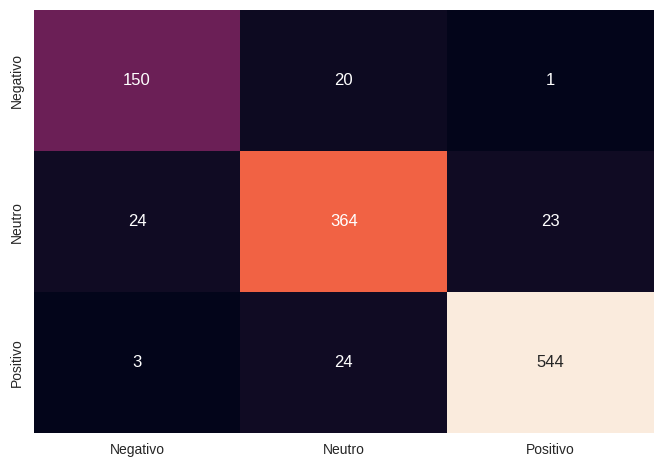

In [144]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Definindo as classes
Classes = ['Negativo', 'Neutro', 'Positivo']

# Plot
Matriz_Confusao = confusion_matrix( y_teste, Previsoes )
sns.heatmap( Matriz_Confusao, annot=True, cbar=False, fmt='d', yticklabels=Classes, xticklabels=Classes );

In [146]:
# Relatorio de classificação
from sklearn.metrics import classification_report

# Avaliacao
Avaliacao = classification_report( y_teste, Previsoes )
print( Avaliacao )

              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       171
      Neutro       0.89      0.89      0.89       411
    Positivo       0.96      0.95      0.96       571

    accuracy                           0.92      1153
   macro avg       0.90      0.91      0.90      1153
weighted avg       0.92      0.92      0.92      1153



# **Teste do Modelo**

In [147]:
def Consolidar_Funcoes( Texto ):

  # 1º Etapa
  Limpeza = Limpeza_Dados( Texto )

  # 2º Etapa
  Stop = Remover_StopWords( Limpeza )

  # 3º Radical
  Rad = Extrair_Radical( Stop )

  # 4º Etapa
  Vet = Vetorizacao.transform( [Rad] )

  # 5º Etapda
  Previsao = Modelo_NB.predict( Vet )

  return( Previsao )

In [148]:
Escrevendo_Tweeter = input('O que está pensando?: ' )
print( f'O sentimento da frase é o seguinte: { Consolidar_Funcoes( Escrevendo_Tweeter)[0] }' )

O que está pensando?: estou com medo!
O sentimento da frase é o seguinte: Neutro


# **Upgrade no Modelo**

In [149]:
# Outros Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Algortimos
Algoritmos = [
    LogisticRegression(),
    RandomForestClassifier( n_estimators=300, max_depth=12 ),
    MultinomialNB(),
    SVC()
]

# Nomes
Lista_Nome = [ 'Regressão Logistica', 'Floresta Aleatoria', 'Naive Bayes', 'Vetor de Maquinas']

In [150]:
# Lista das acuracias
Resultado_Acuracia = []

# Loop
for Nome, Modelo in zip( Lista_Nome, Algoritmos):

  # Atribuir o algortimo
  Alg = Modelo

  # Treinamento
  Alg.fit( Fequencia_Palavras, y_treino )

  # transformar os dados de teste
  Vetor_Teste = Vetorizacao.transform( x_teste )

  # Previsão
  Previoes_Teste = Alg.predict( Vetor_Teste )

  # Resultado
  Resultado = accuracy_score( y_teste, Previoes_Teste )

  # Salvar
  Resultado_Acuracia.append( Resultado )

In [151]:
# Organizar
Dicionario = {
    'Nome' : Lista_Nome,
    'Resultado' : Resultado_Acuracia
}

pd.DataFrame( Dicionario ).sort_values('Resultado', ascending=False )

,Nome,Resultado
3,Vetor de Maquinas,0.947962
0,Regressão Logistica,0.942758
2,Naive Bayes,0.917606
1,Floresta Aleatoria,0.889853
